In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sweetviz as sv
from pycaret.regression import *

In [25]:
df = pd.read_csv("combined_data.csv", low_memory=False)
df['Sales Date'] = pd.to_datetime(df['Sales Date'])
df['Sales Week'] = df['Sales Date'].dt.strftime('%Y-%U')
df['Sales Quarter'] = df['Sales Date'].dt.strftime('%Y-Q') + df['Sales Date'].dt.quarter.astype(str)
# df['Sales Quarter'] = df['Sales Date'].dt.strftime('%Y-Q%q')
df['Sales Month'] = df['Sales Date'].dt.strftime('%Y-M%m')
df.head()

,APN,Situs,Sales Date,Sale Price,Sale Verf,Subdivision,Year Blt,Avg Yr Blt,BldgType,Stories,...,LUC at Sale,Zoning (codes should be verified with the zoning authority),Acres,PriorPID,TaxDist,Total Units,Neighborhood,Sales Week,Sales Quarter,Sales Month
0,001-020-02,3945 KINGS ROW,2005-05-24,266000,2D,WINDERMERE 1,1984,1984,Townhse Ins,TWO,...,21,MF14,0.001,NaN,1005,1,NaN,2005-21,2005-Q2,2005-M05
1,001-020-10,3961 KINGS ROW,2005-11-14,275000,2D,WINDERMERE 1,1984,1984,Townhse Ins,TWO,...,21,MF14,0.001,NaN,1005,1,NaN,2005-46,2005-Q4,2005-M11
2,001-020-15,3971 KINGS ROW,2005-03-25,199500,2D,WINDERMERE 1,1984,1984,Townhse End,TWO,...,21,MF14,0.001,NaN,1005,1,NaN,2005-12,2005-Q1,2005-M03
3,001-030-08,2790 COLUMBUS WAY,2005-11-16,300000,2D,WINDERMERE EST,1984,1984,Sgl Fam Res,TWO,...,20,SF15,0.609,NaN,1005,1,NaN,2005-46,2005-Q4,2005-M11
4,001-030-17,2815 COLUMBUS WAY,2005-03-15,303000,2D,WINDERMERE EST,1984,1984,Sgl Fam Res,TWO,...,20,SF15,0.225,204-240-30,1005,1,NaN,2005-11,2005-Q1,2005-M03


                                             |                                                                …


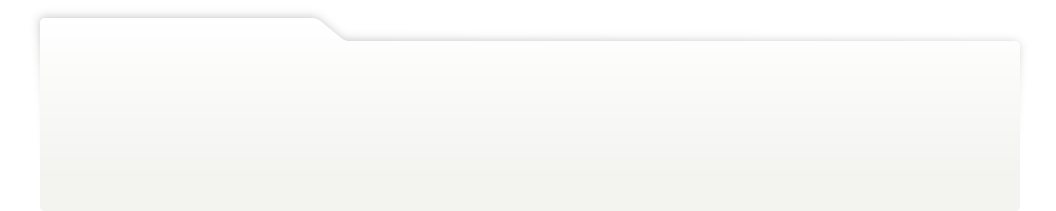
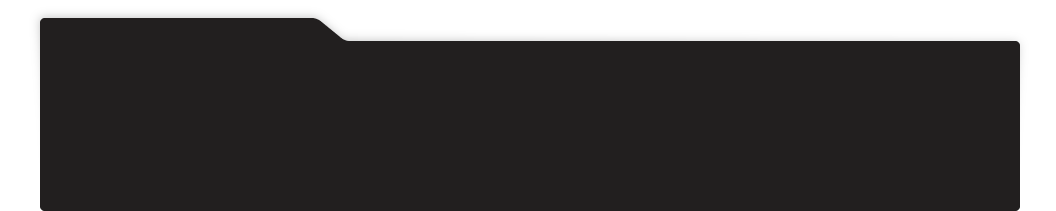
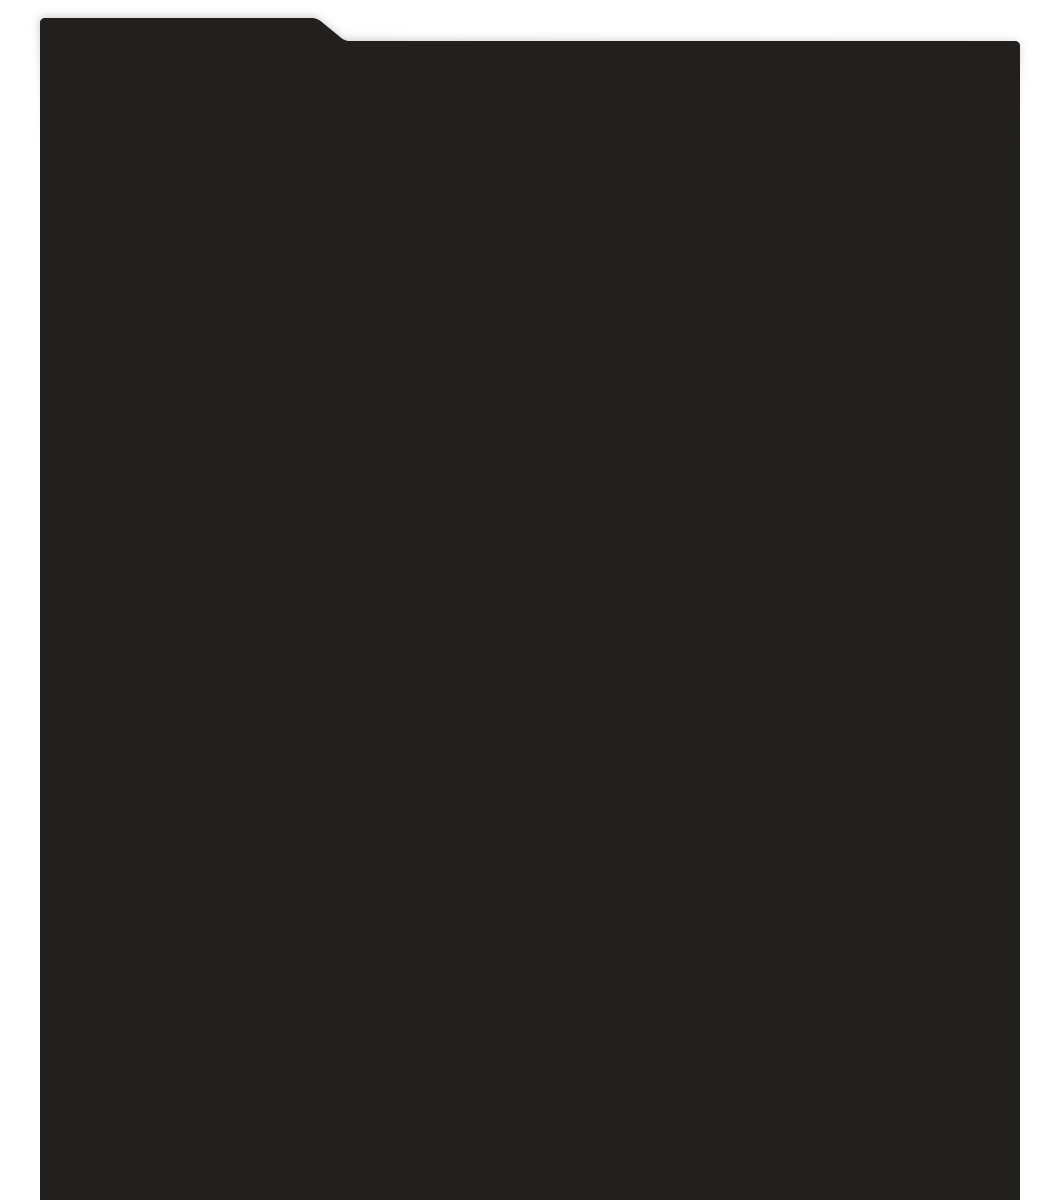
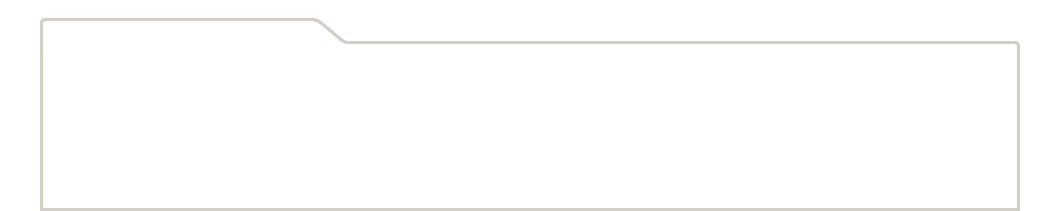
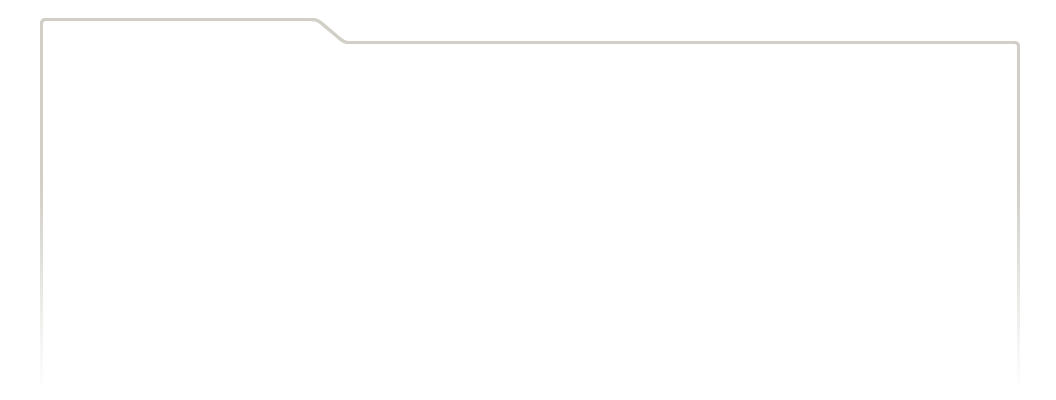
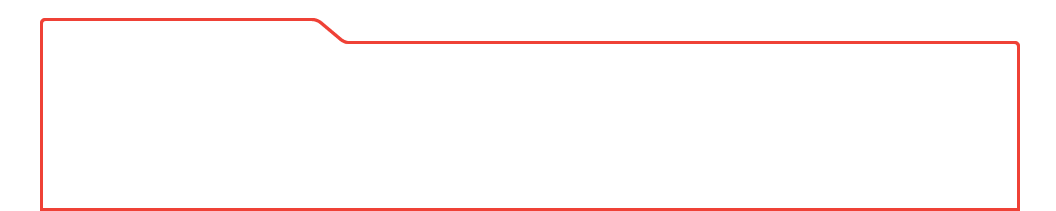
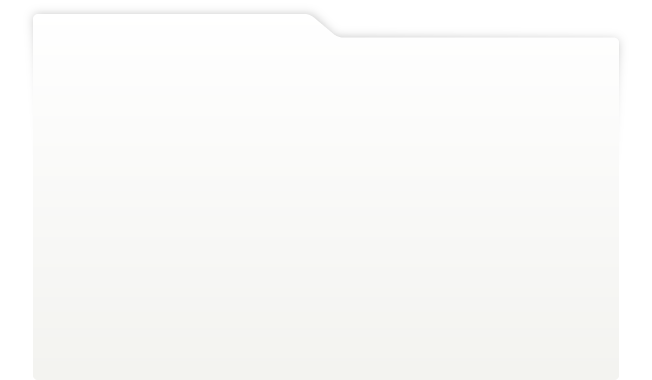
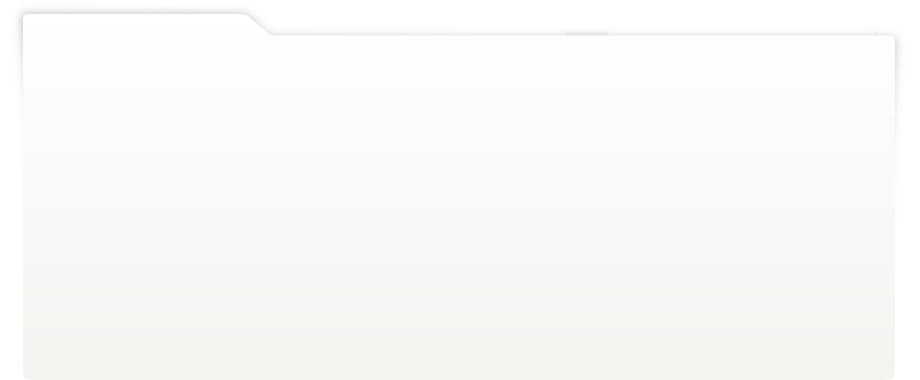
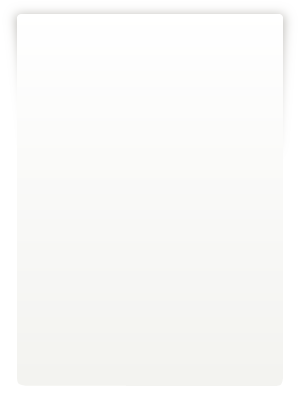
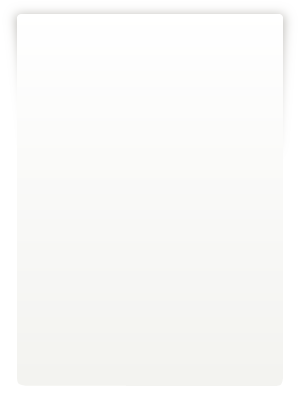
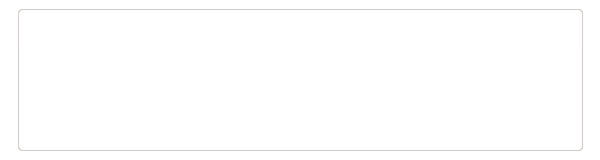
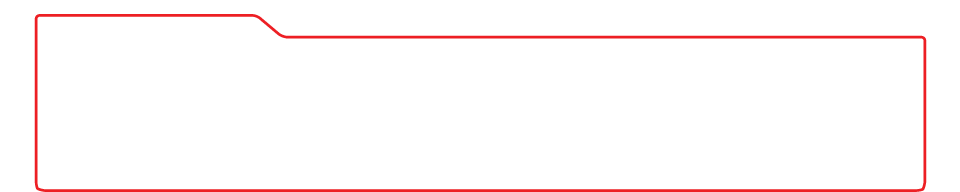
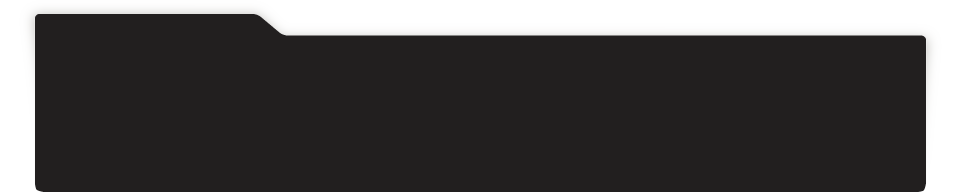
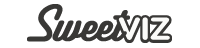
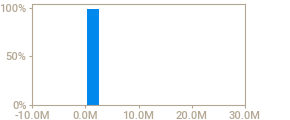
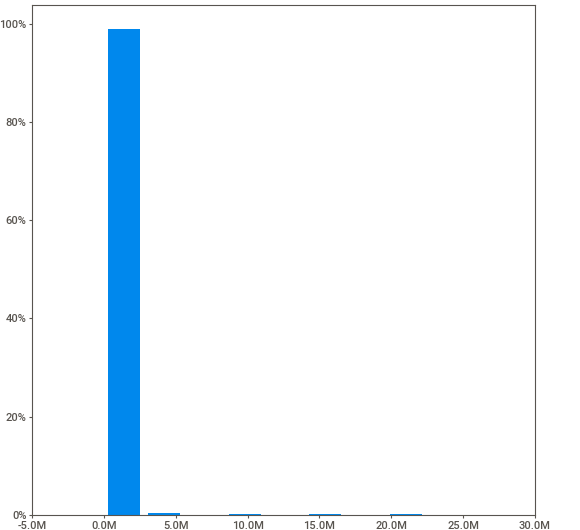
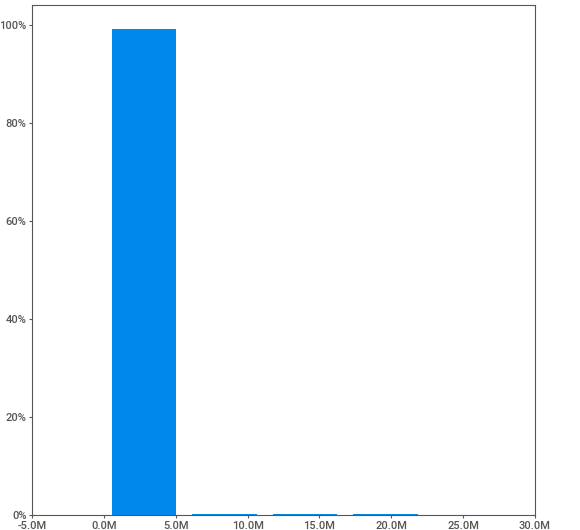
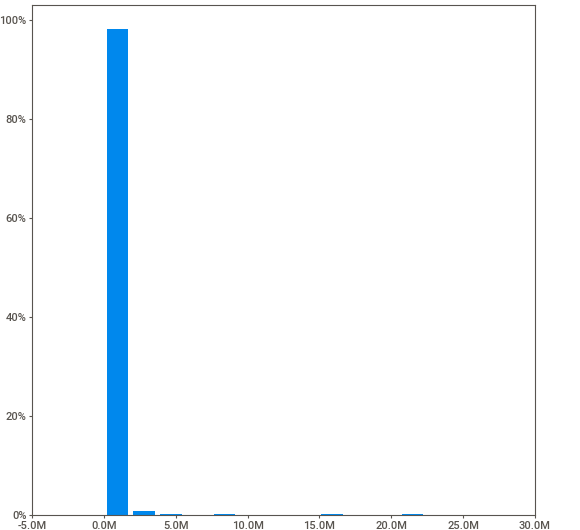
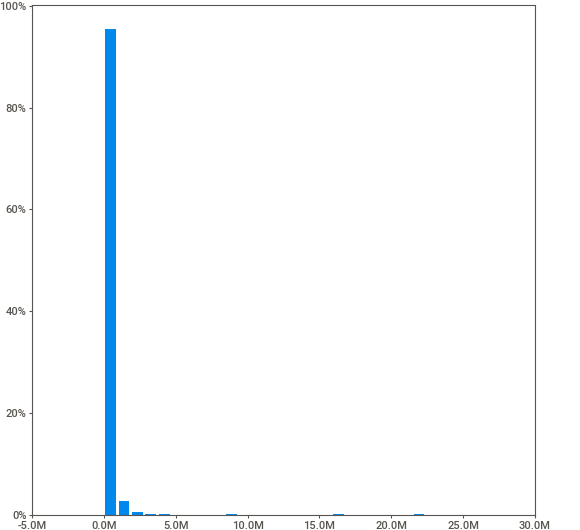
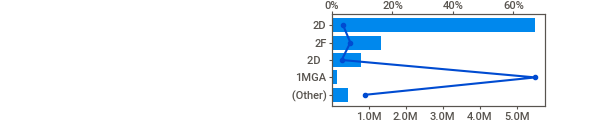
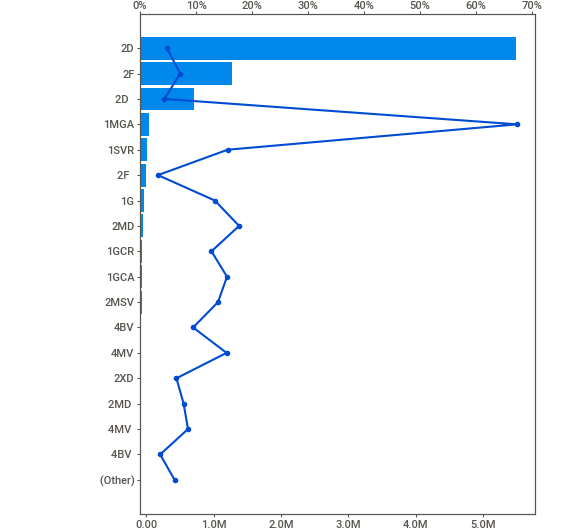
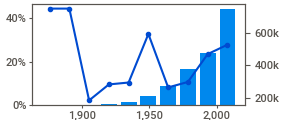
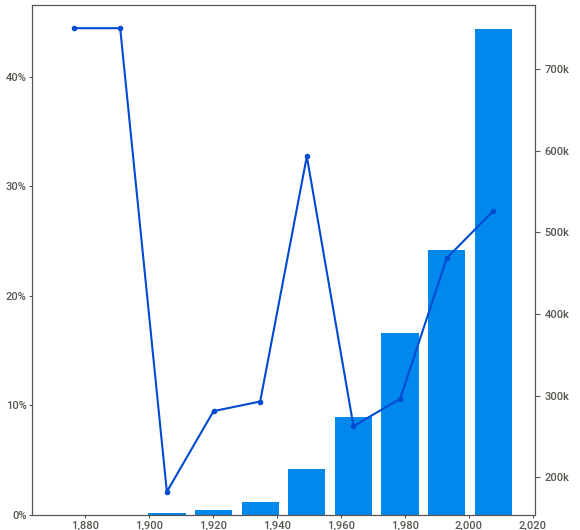
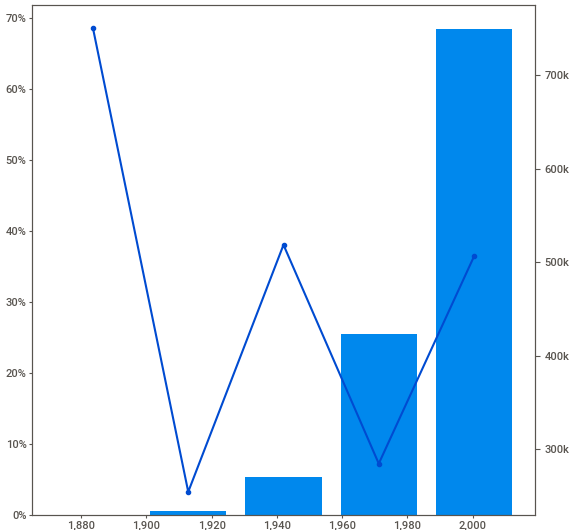
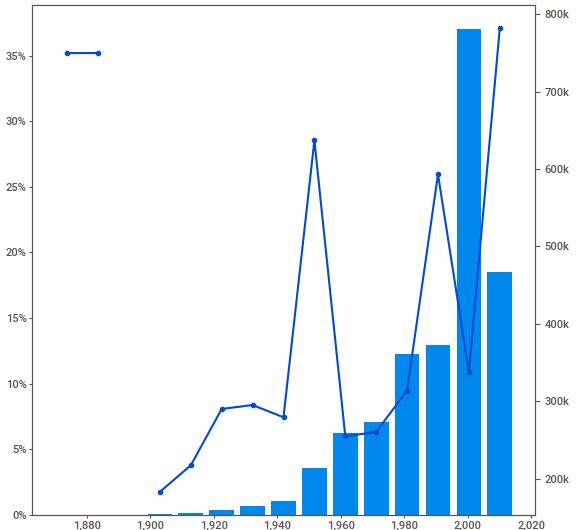
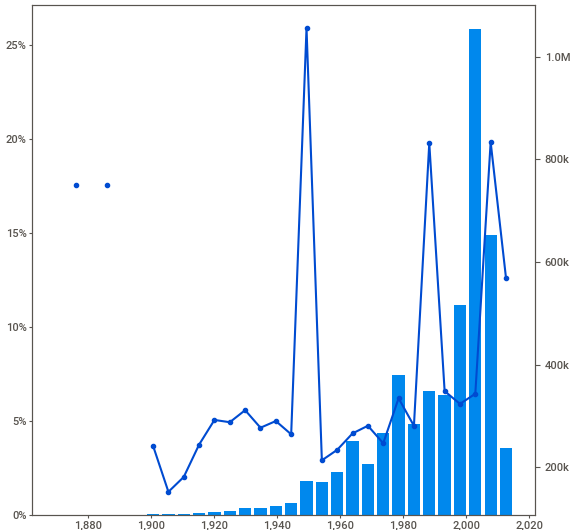
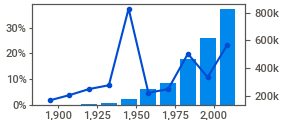
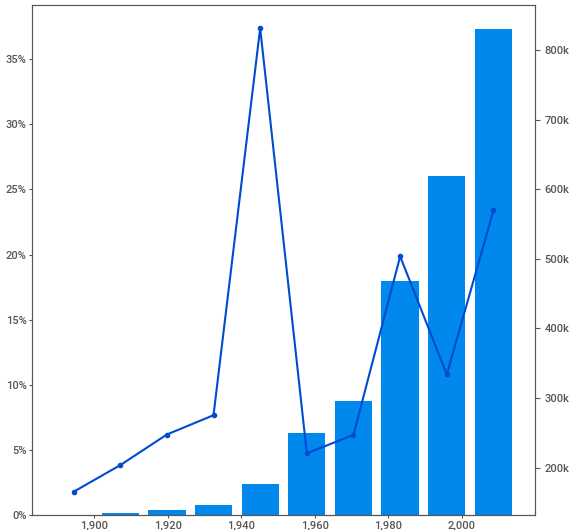
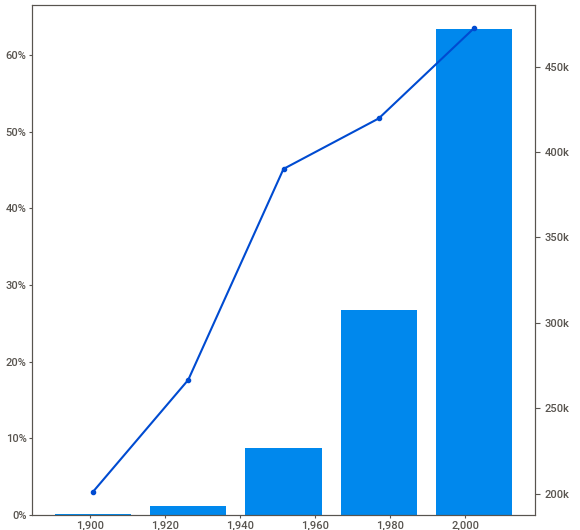
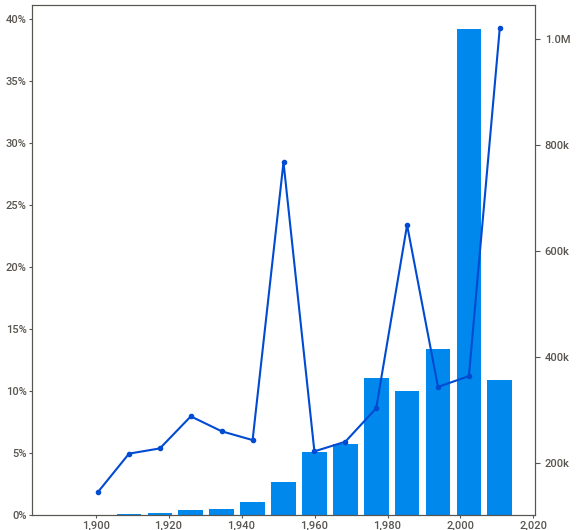
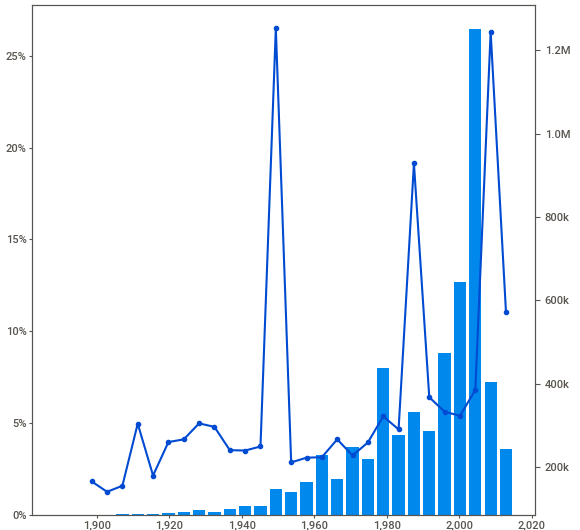
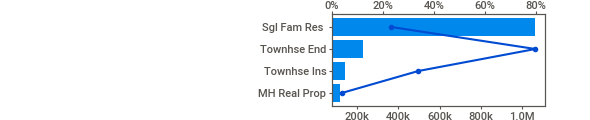
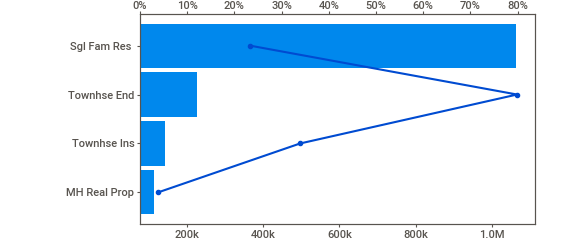
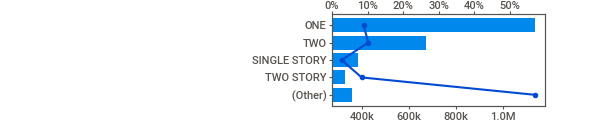
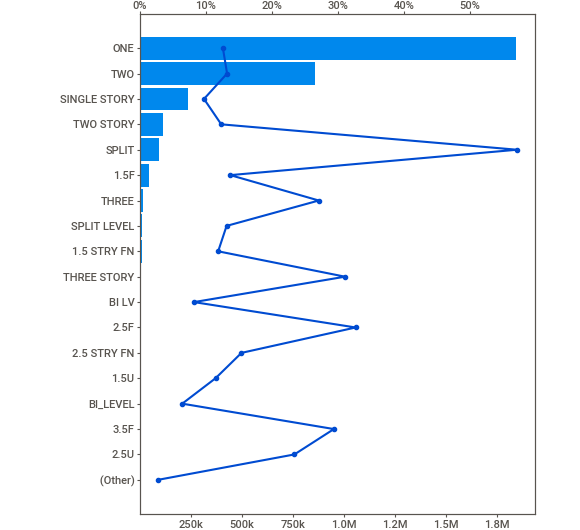
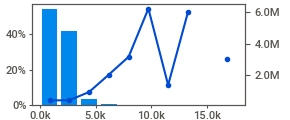
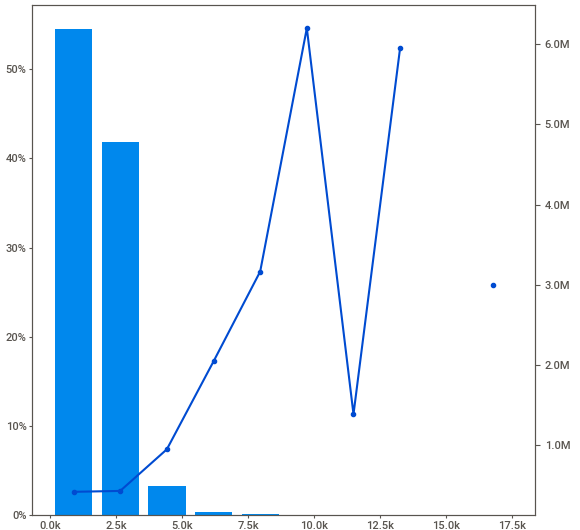
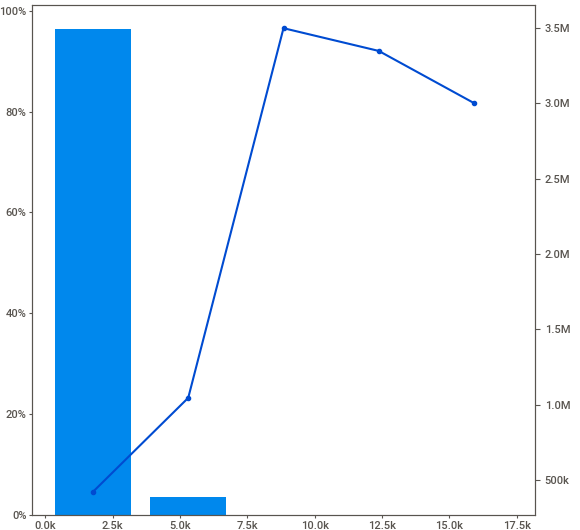
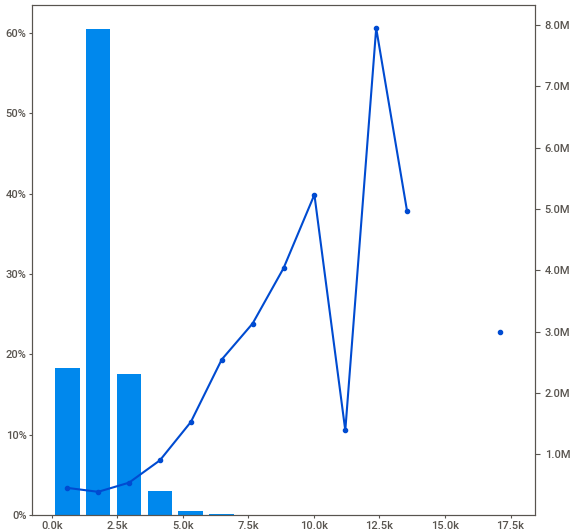
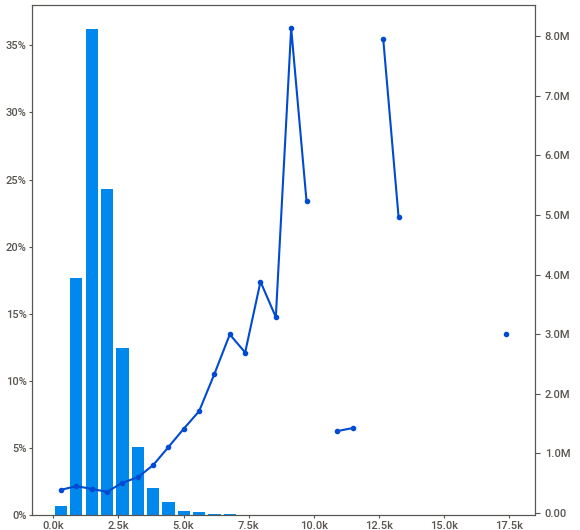
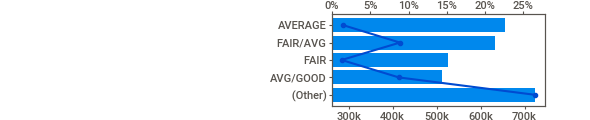
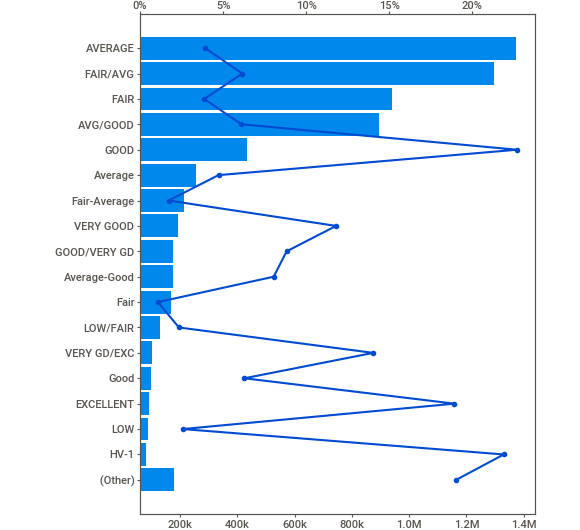
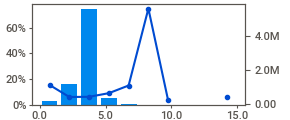
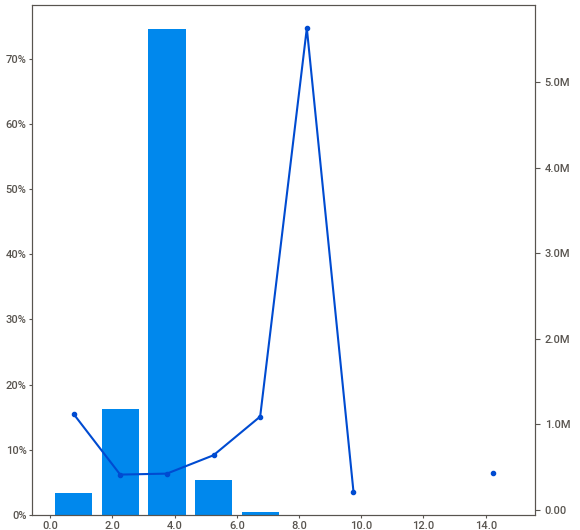
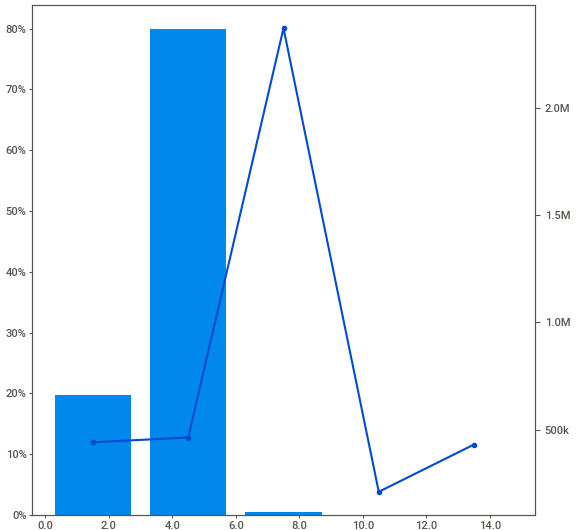
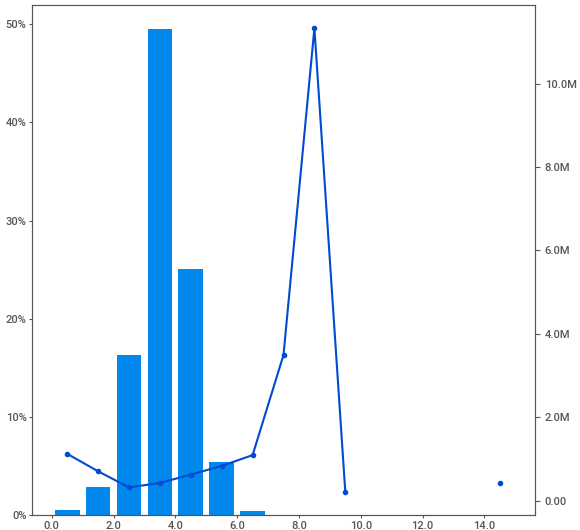
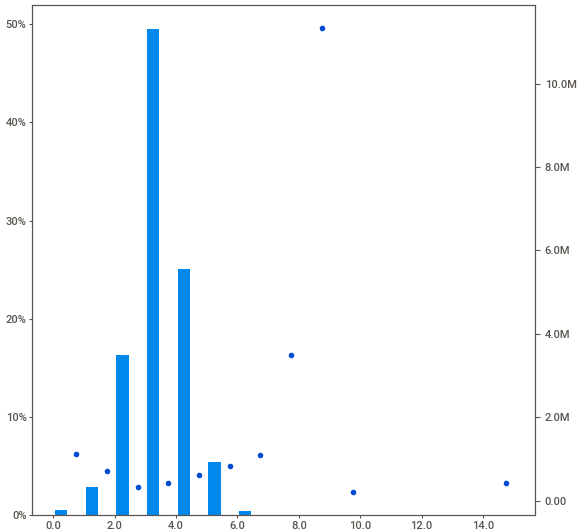
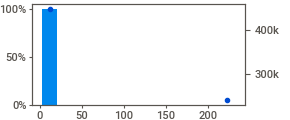
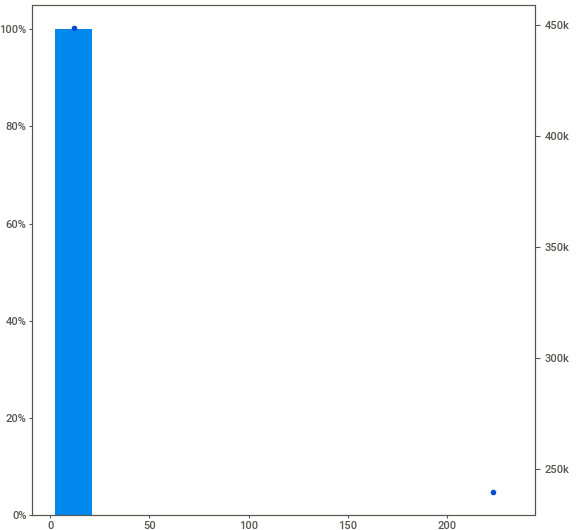
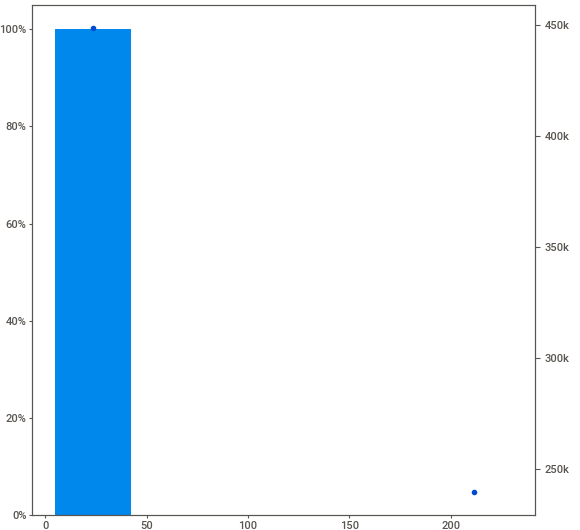
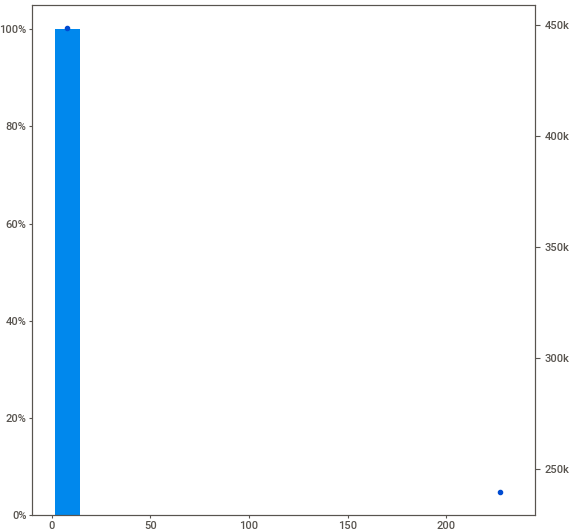
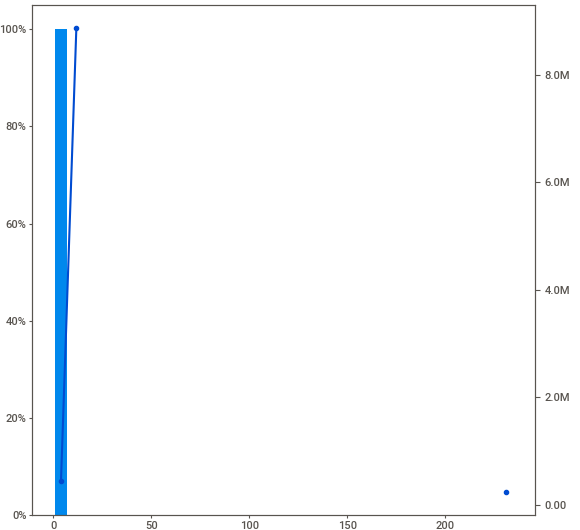
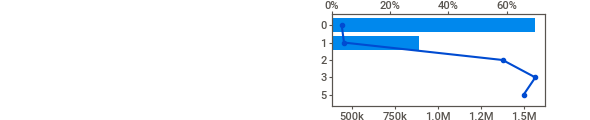
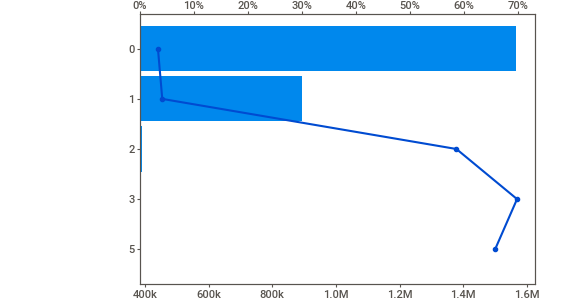
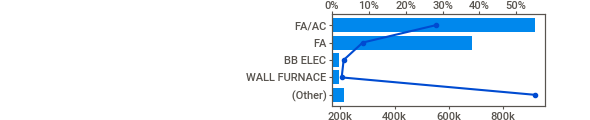
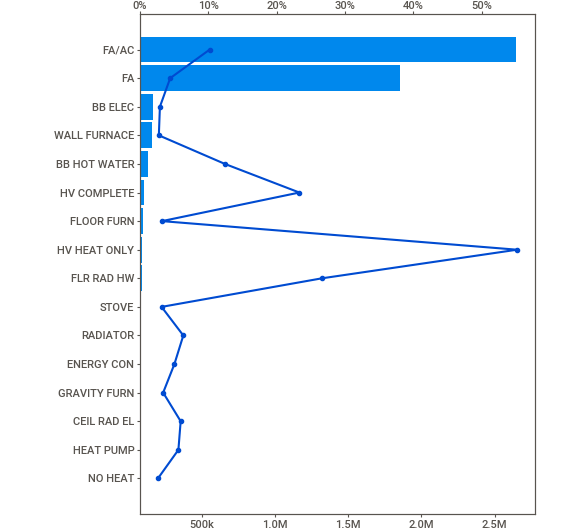
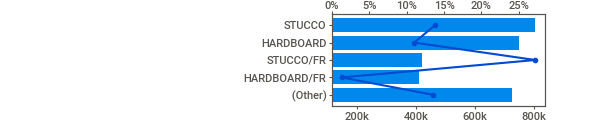
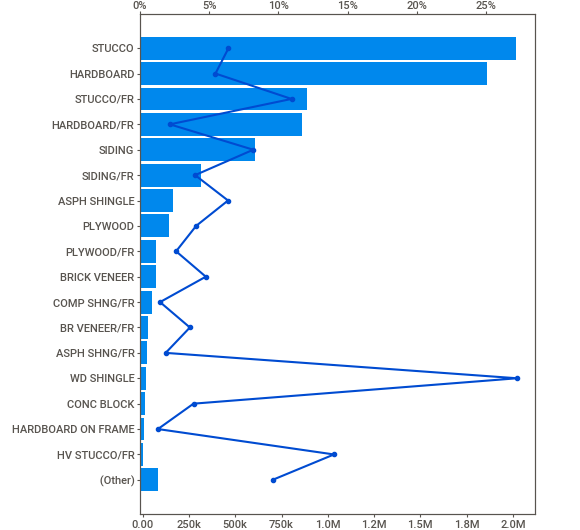
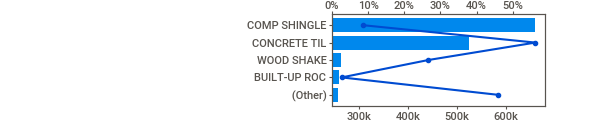
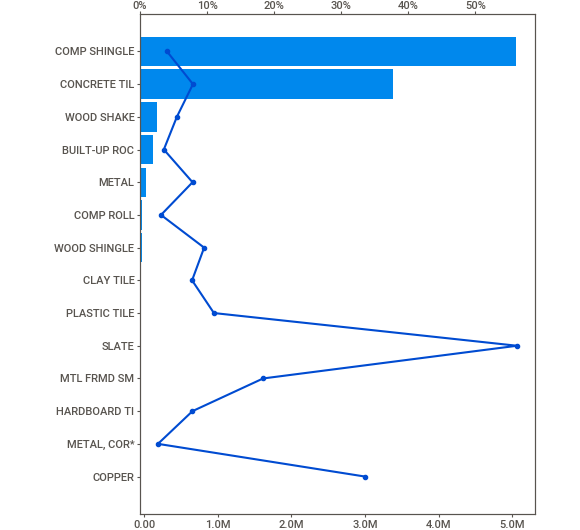
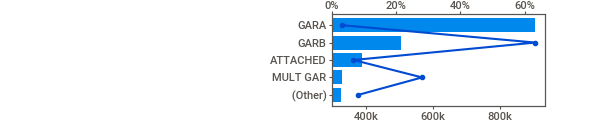
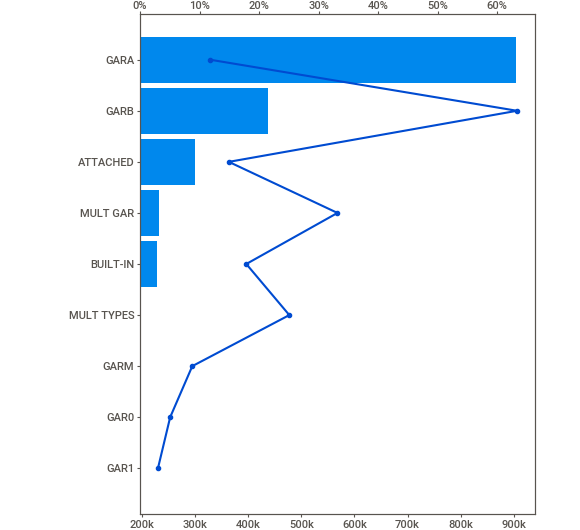
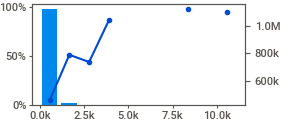
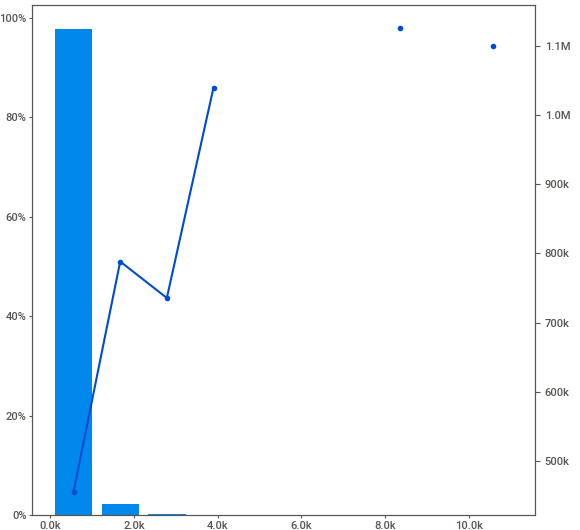
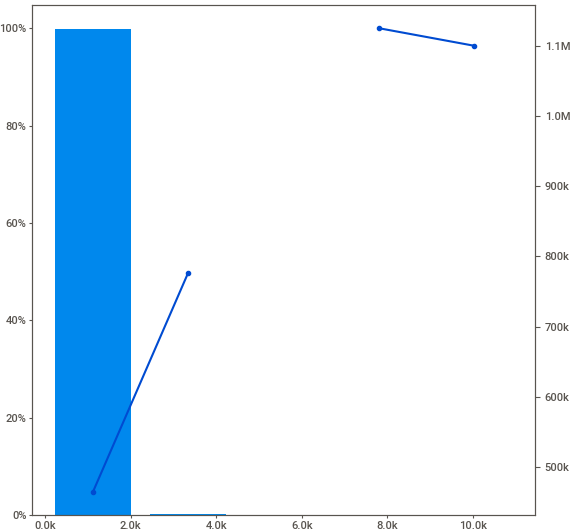
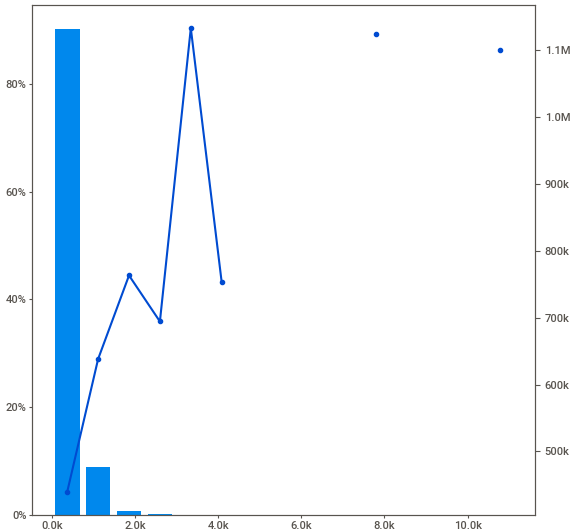
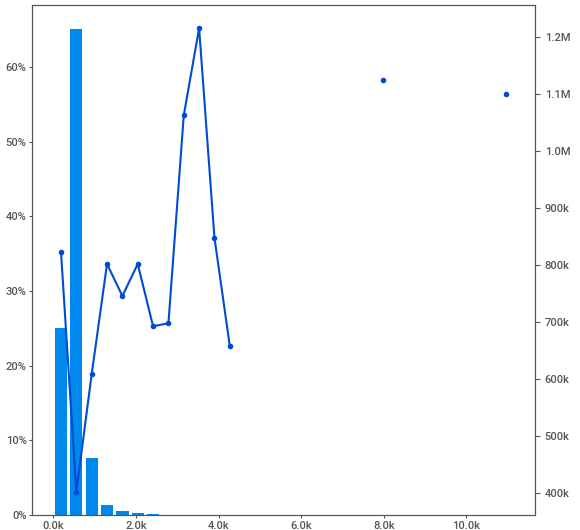
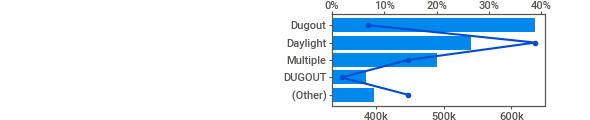
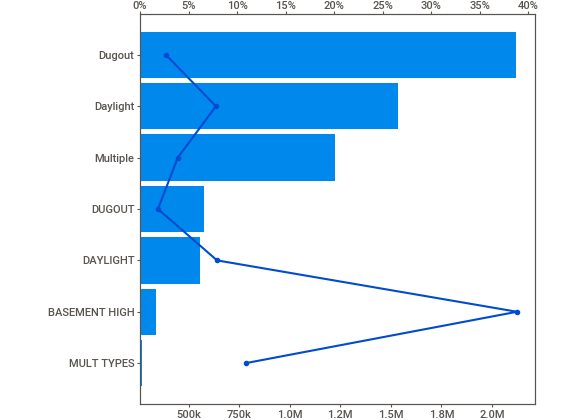
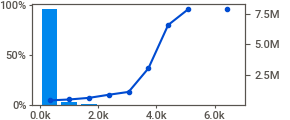
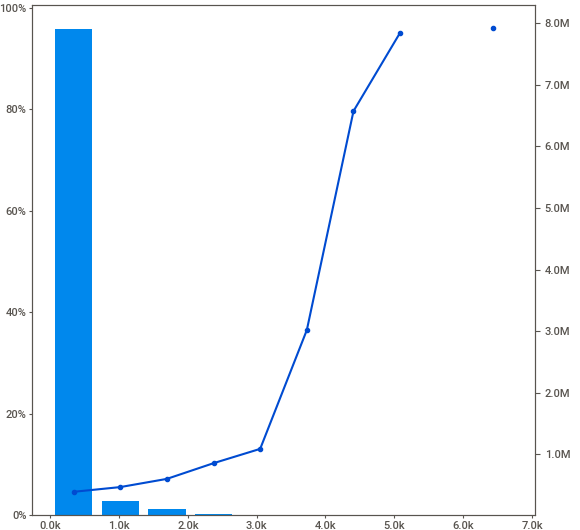
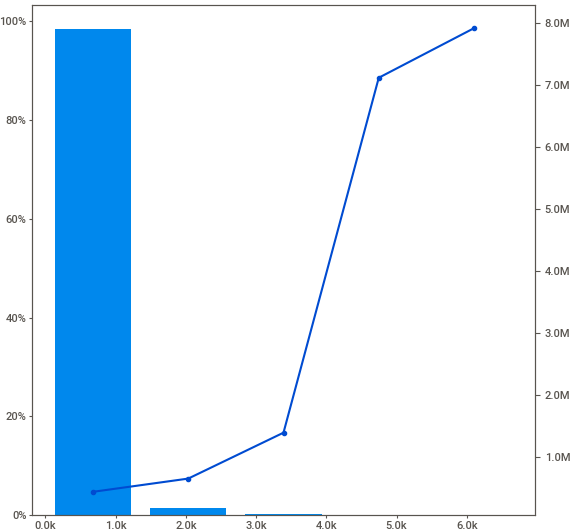
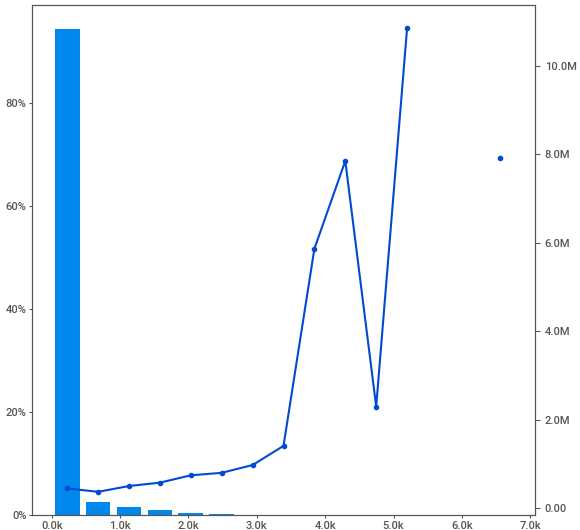
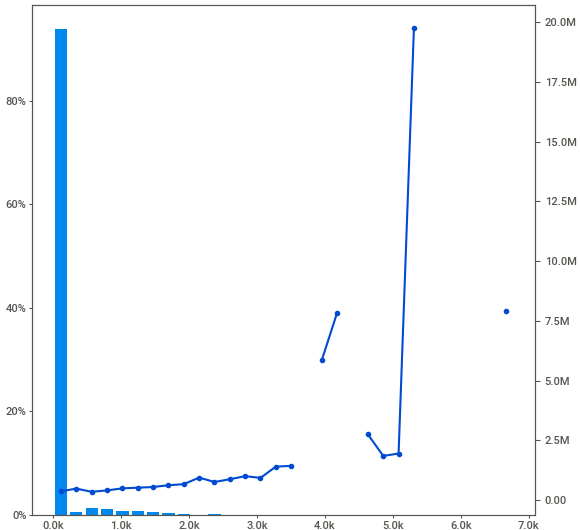
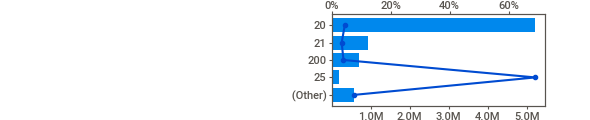
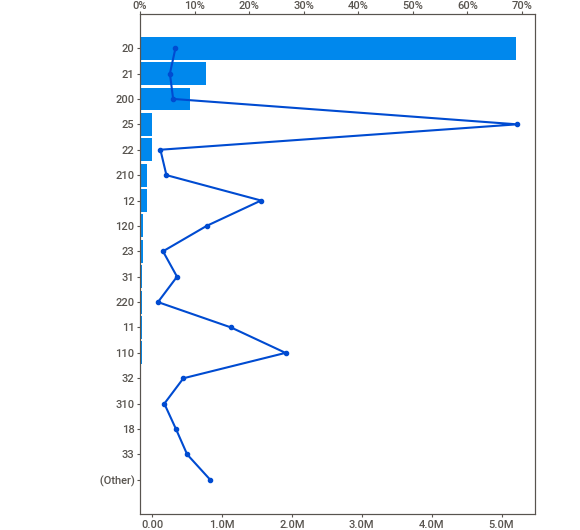
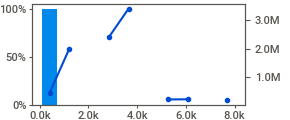
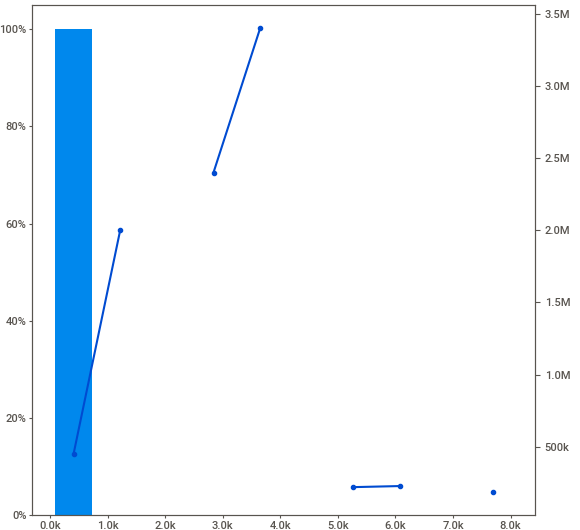
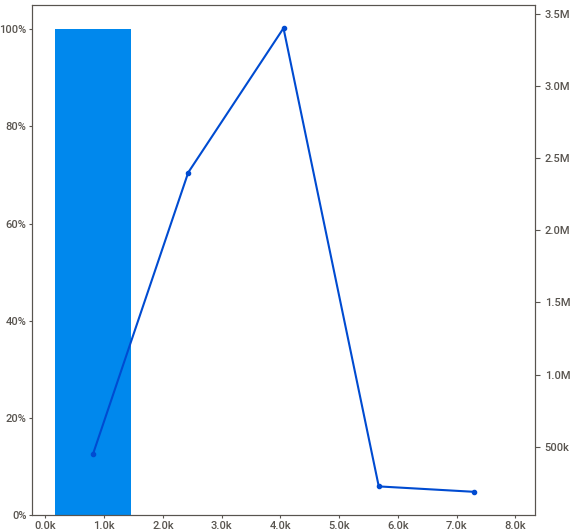
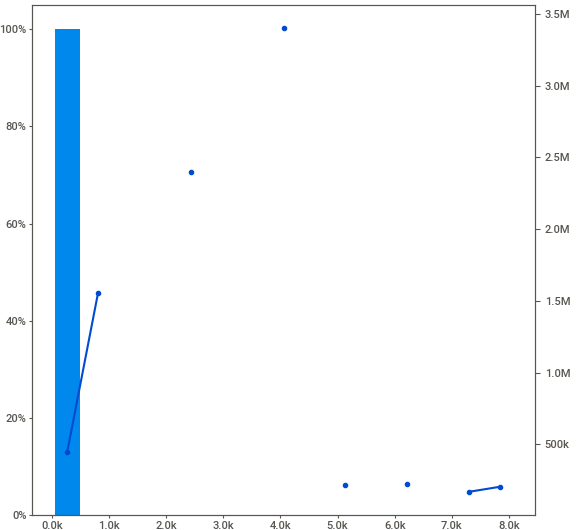
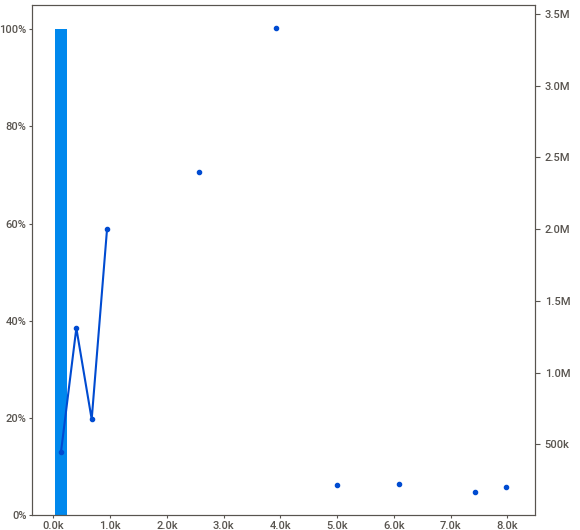
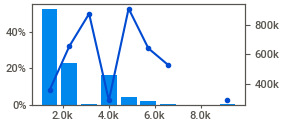
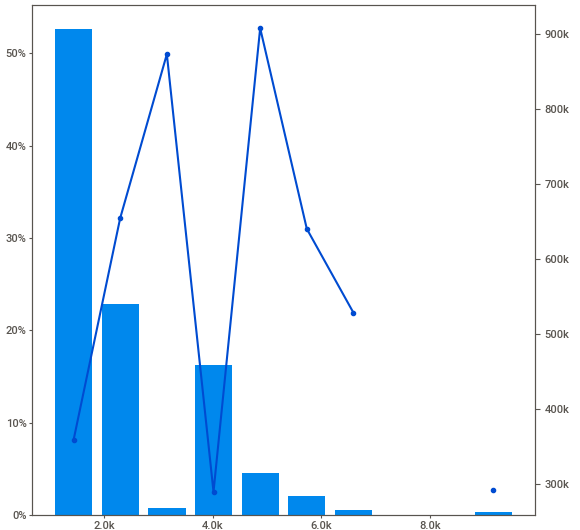
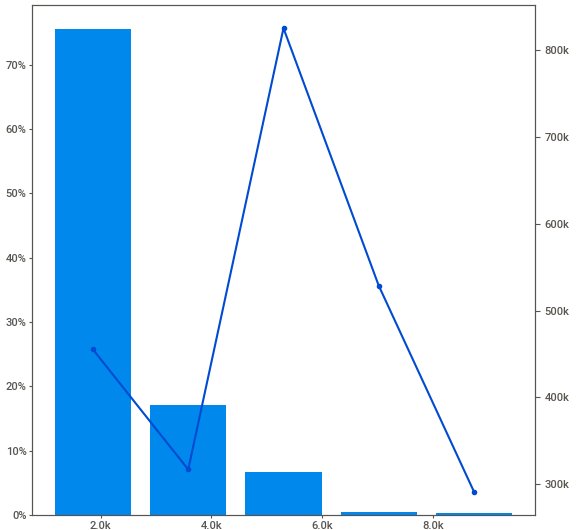
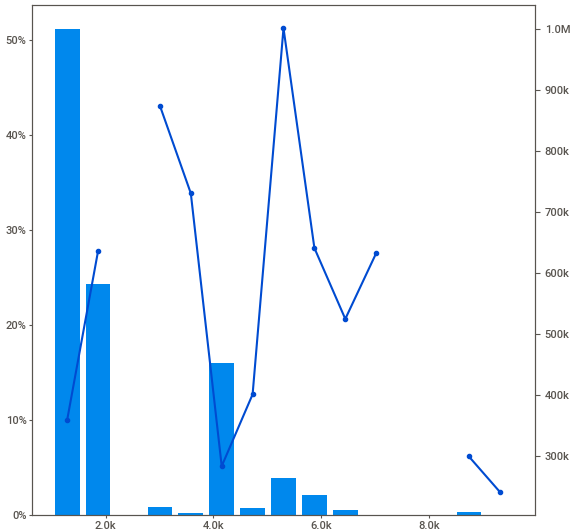
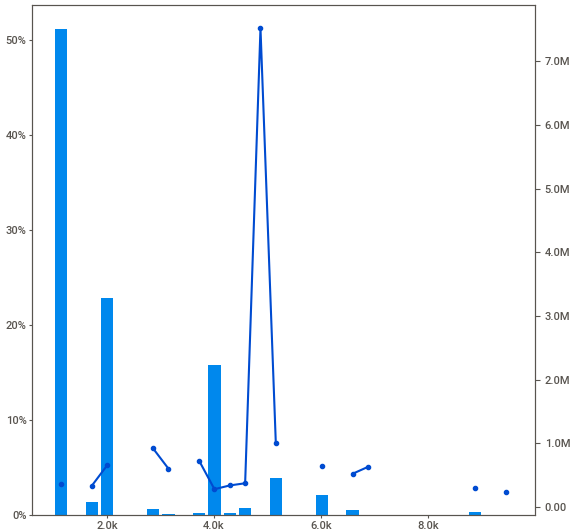
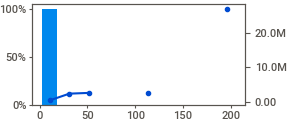
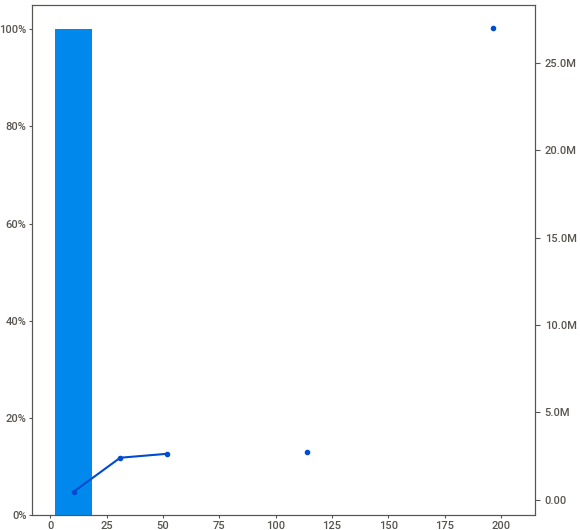
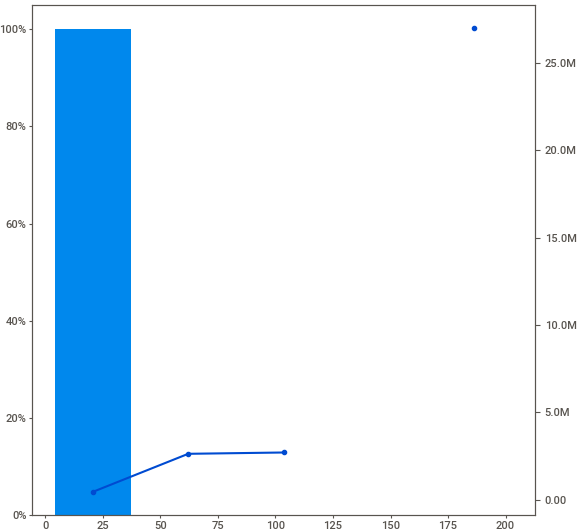
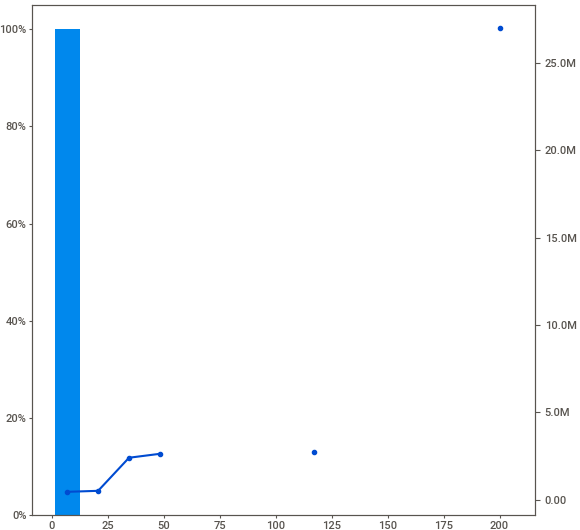
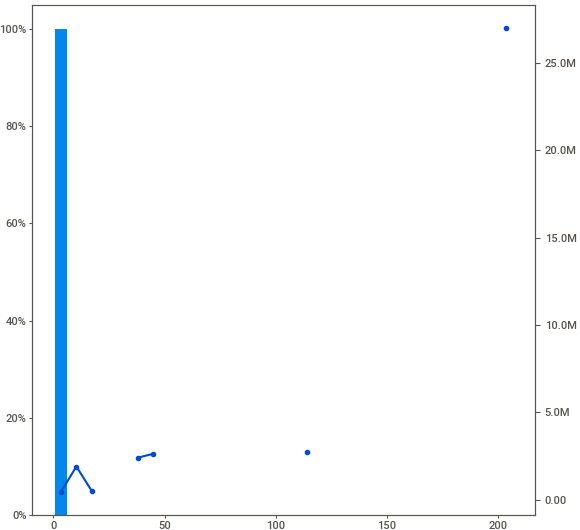
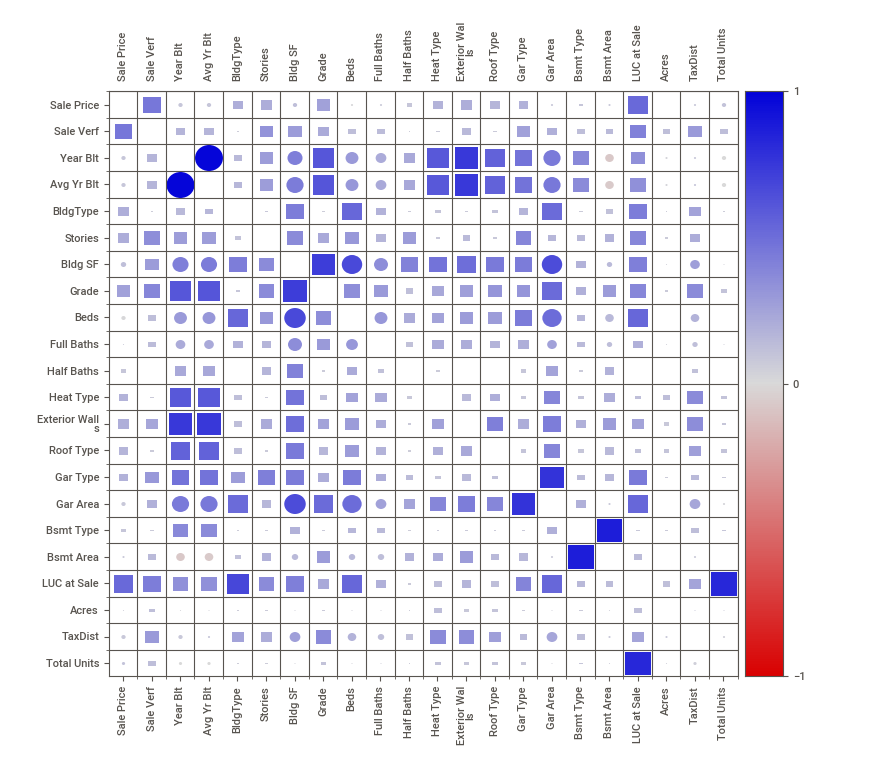
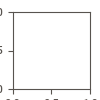

In [6]:
feature_config = sv.FeatureConfig(skip=['APN', 'Situs', 'PriorPID'], force_cat=["Year Blt", 'Avg Yr Blt', 'TaxDist'])
report = sv.analyze(df, target_feat='Sale Price')
report.show_notebook(h=1500)

In [20]:
experiment = setup(data=df, target='Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])

,Description,Value
0,Session id,2690
1,Target,Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 30)"
4,Transformed data shape,"(80639, 513)"
5,Transformed train set shape,"(56447, 513)"
6,Transformed test set shape,"(24192, 513)"
7,Ignore features,17
8,Numeric features,7
9,Categorical features,5


In [26]:
print('By week')
experiment = setup(data=df, target='Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood', 'Sales Month', 'Sales Quarter'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])
compare_models()

print('By month')
experiment = setup(data=df, target='Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood', 'Sales Week', 'Sales Quarter'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])
compare_models()

print('By quarter')
experiment = setup(data=df, target='Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood', 'Sales Week', 'Sales Month'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])
compare_models()

By week


,Description,Value
0,Session id,6382
1,Target,Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 32)"
4,Transformed data shape,"(80639, 514)"
5,Transformed train set shape,"(56447, 514)"
6,Transformed test set shape,"(24192, 514)"
7,Ignore features,19
8,Numeric features,7
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,97805.8310,137293758904.3100,361980.2997,0.9427,0.4328,7.5065,222.7200
rf,Random Forest Regressor,106165.7019,159254547286.6425,391750.8538,0.9334,0.4535,8.1312,722.7580
lightgbm,Light Gradient Boosting Machine,127355.9227,227059975620.7988,460669.4924,0.9053,0.5239,7.6670,135.4850
gbr,Gradient Boosting Regressor,168862.9012,233403677829.0408,478436.4710,0.9017,0.6620,18.3731,143.9890
dt,Decision Tree Regressor,134513.8824,294543400308.1592,532456.4726,0.8758,0.5797,8.5634,25.2210
lar,Least Angle Regression,345444.8350,1263039465066.0703,1121842.3391,0.4598,1.1033,18.6914,9.6580
lasso,Lasso Regression,351509.0314,1276550690341.9326,1127826.2284,0.4542,1.1437,12.4822,9.4980
llar,Lasso Least Angle Regression,351509.0314,1276550690341.9341,1127826.2284,0.4542,1.1437,12.4822,9.5370
omp,Orthogonal Matching Pursuit,358849.0584,1280167354794.6736,1129476.6898,0.4525,1.1466,11.2498,9.5790
lr,Linear Regression,356552.8634,1286718717495.0364,1132068.2340,0.4501,1.1173,19.2530,10.1940


By month


,Description,Value
0,Session id,8709
1,Target,Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 32)"
4,Transformed data shape,"(80639, 150)"
5,Transformed train set shape,"(56447, 150)"
6,Transformed test set shape,"(24192, 150)"
7,Ignore features,19
8,Numeric features,7
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,95860.5285,176522137034.5531,415926.5037,0.9164,0.4097,13.0478,48.3860
rf,Random Forest Regressor,104208.3490,209604121233.8268,452969.8633,0.9043,0.4293,11.5672,201.5100
lightgbm,Light Gradient Boosting Machine,129956.5746,224366161621.0649,469142.0270,0.8956,0.5211,14.3046,106.0930
gbr,Gradient Boosting Regressor,176048.6726,329885288464.6356,570454.3115,0.8490,0.6464,19.9183,43.1110
dt,Decision Tree Regressor,130901.8210,367485530097.6224,600604.9566,0.8311,0.5365,13.8233,6.3890
lasso,Lasso Regression,439195.9936,1804010251847.2727,1339924.3652,0.1805,1.2743,10.0207,2.2200
llar,Lasso Least Angle Regression,439195.9936,1804010251847.2727,1339924.3652,0.1805,1.2743,10.0207,2.2210
lar,Least Angle Regression,441693.8254,1806117096787.8120,1340530.6612,0.1800,1.2709,10.8278,2.2040
lr,Linear Regression,444097.9920,1815130405062.2292,1343945.8812,0.1757,1.2685,10.1840,2.3050
ridge,Ridge Regression,412660.7510,2063244552434.2583,1431692.4204,0.0669,1.2132,30.5734,2.2000


By quarter


,Description,Value
0,Session id,3516
1,Target,Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 32)"
4,Transformed data shape,"(80639, 77)"
5,Transformed train set shape,"(56447, 77)"
6,Transformed test set shape,"(24192, 77)"
7,Ignore features,19
8,Numeric features,7
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,98444.8601,206607887673.9780,436069.2518,0.9124,0.4145,7.5141,20.3890
rf,Random Forest Regressor,104821.8621,205403187935.0787,445175.3484,0.9113,0.4265,8.6706,94.2840
lightgbm,Light Gradient Boosting Machine,132815.2009,232671728889.8226,476446.4455,0.8998,0.5305,12.8826,90.6720
dt,Decision Tree Regressor,125314.4060,344014665669.5524,578442.6411,0.8509,0.5211,7.3819,2.9060
gbr,Gradient Boosting Regressor,175854.5494,355933544396.6532,589707.3208,0.8466,0.6379,19.2824,23.3630
ada,AdaBoost Regressor,798852.1600,1387969978418.9390,1141262.0414,0.4022,1.5446,68.8942,4.4410
lar,Least Angle Regression,472879.9685,2035091465863.0081,1424504.2936,0.1254,1.3197,16.5525,1.0200
lasso,Lasso Regression,472004.6478,2036568286979.1108,1425010.4087,0.1248,1.3209,16.3738,1.0440
llar,Lasso Least Angle Regression,472004.6478,2036568286979.1111,1425010.4087,0.1248,1.3209,16.3738,1.0220
lr,Linear Regression,473963.3850,2039578197168.7700,1426044.0494,0.1235,1.3214,15.7766,1.0690


ExtraTreesRegressor(n_jobs=-1, random_state=3516)

In [32]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96034.8642,115304545161.1632,339565.2296,0.9545,0.4094,9.9622
1,91717.3418,114532581965.1825,338426.6272,0.9604,0.4181,11.2816
2,98191.2313,228448319224.0899,477962.6756,0.9051,0.3968,0.3472
3,100036.7493,223975463916.0005,473260.4610,0.8929,0.4192,11.9368
4,91266.2372,126766907259.7481,356043.4064,0.9410,0.3850,0.3136
5,93844.8726,90302255356.2926,300503.3367,0.9566,0.4553,27.7824
6,96503.5782,185826000513.6148,431075.4000,0.9108,0.3976,0.3493
7,92934.9216,146367912088.6058,382580.5955,0.9324,0.4122,12.4118
8,95823.0922,240816474341.1768,490730.5517,0.8896,0.3948,0.3257


In [33]:
tune_model(model, search_algorithm='random', optimize='mse', n_iter=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:27:09
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [34]:
model = create_model('rf')
tune_model(model, search_algorithm='random', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,103231.4459,114590191513.8523,338511.7302,0.9548,0.4322,9.8518
1,100202.6835,155377062749.4237,394178.9730,0.9463,0.4400,15.4550
2,106744.8082,252115241753.2220,502110.7863,0.8953,0.4094,0.3618
3,111825.7086,283457335643.4912,532407.1146,0.8644,0.4410,13.6701
4,95891.8491,131024428546.9185,361972.9666,0.9390,0.3983,0.3452
5,104057.9319,112774453232.9799,335819.0781,0.9458,0.4761,32.1607
6,101790.6745,206153697530.2945,454041.5152,0.9011,0.4016,0.3666
7,102365.5446,195651790034.8571,442325.4345,0.9096,0.4318,13.7437
8,98496.3937,230707333766.8462,480320.0327,0.8942,0.3942,0.3361


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:45:53
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [35]:
model = create_model('dt')
tune_model(model, search_algorithm='random', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122190.7047,248198673685.8796,498195.4172,0.9020,0.5109,7.4520
1,119463.1740,284058090299.8404,532971.0032,0.9019,0.5091,11.9092
2,123418.9703,284697222726.9406,533570.2603,0.8817,0.4931,0.4334
3,135930.8339,506402138620.4880,711619.3776,0.7578,0.5445,13.7589
4,121054.1901,274741762944.1090,524158.1469,0.8721,0.4862,0.3964
5,123370.4230,315907810011.1820,562056.7676,0.8483,0.5546,26.7418
6,131093.2570,402897582122.7513,634742.1383,0.8066,0.5138,0.4719
7,116870.1866,190553944577.0975,436524.8499,0.9120,0.5475,11.7198
8,119487.5137,329125823609.0198,573694.8872,0.8491,0.5055,0.3743


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,142053.2531,177116197607.8434,420851.7525,0.9301,0.5884,23.3181
1,144265.9123,465048214468.4965,681944.4365,0.8394,0.5537,18.7087
2,145718.1103,356242485782.3697,596860.5246,0.8520,0.5335,0.5142
3,152398.1078,650339379598.2312,806436.2217,0.6889,0.5625,18.4198
4,128171.1516,251551721771.3910,501549.3214,0.8829,0.5045,0.4768
5,137341.7082,227889166646.9117,477377.3839,0.8905,0.5910,64.3531
6,130207.9882,193378774914.8725,439748.5360,0.9072,0.5231,0.5407
7,131024.6968,190904312464.0706,436925.9805,0.9118,0.5533,30.5744
8,129060.0226,287974582032.0280,536632.6323,0.8680,0.5159,0.4777


Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeRegressor(max_depth=15, max_features=1.0,
                      min_impurity_decrease=0.001, min_samples_leaf=5,
                      random_state=3516)

In [36]:
df['Log Sale Price']=np.log(df['Sale Price'])

In [38]:
print('By week')
experiment = setup(data=df, target='Log Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood', 'Sales Month', 'Sales Quarter', 'Sale Price'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])
compare_models()

print('By month')
experiment = setup(data=df, target='Log Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood', 'Sales Week', 'Sales Quarter', 'Sale Price'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])
compare_models()

print('By quarter')
experiment = setup(data=df, target='Log Sale Price', pca=True, ignore_features=['APN', 'Situs', 'Sales Date', 'Sale Verf', 'Subdivision',
       'Year Blt', 'Avg Yr Blt', 'Stories', 'Grade', 'Heat Type', 'Exterior Walls', 'LUC at Sale', 'Zoning (codes should be verified with the zoning authority) ',
       'PriorPID', 'TaxDist', 'Total Units', 'Neighborhood', 'Sales Week', 'Sales Month', 'Sale Price'], transformation=True, max_encoding_ohe=-1, 
       numeric_features=['Bldg SF', 'Beds', 'Full Baths', 'Half Baths', 'Gar Area', 'Bsmt Area', 'Acres',])
compare_models()

By week


,Description,Value
0,Session id,497
1,Target,Log Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 33)"
4,Transformed data shape,"(80639, 516)"
5,Transformed train set shape,"(56447, 516)"
6,Transformed test set shape,"(24192, 516)"
7,Ignore features,20
8,Numeric features,7
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2556,0.1662,0.4075,0.7696,0.0395,0.0208,183.8880
lightgbm,Light Gradient Boosting Machine,0.2623,0.1681,0.4097,0.7672,0.0385,0.0212,147.3060
rf,Random Forest Regressor,0.2618,0.1708,0.4131,0.7633,0.0392,0.0213,431.6880
gbr,Gradient Boosting Regressor,0.3577,0.2713,0.5206,0.6242,0.0456,0.0289,143.2010
br,Bayesian Ridge,0.3206,0.2924,0.5406,0.5948,0.0456,0.0254,11.5630
lr,Linear Regression,0.3221,0.2928,0.5410,0.5943,0.0456,0.0256,10.2140
lar,Least Angle Regression,0.3221,0.2949,0.5428,0.5915,0.0458,0.0256,9.6270
dt,Decision Tree Regressor,0.3645,0.3493,0.5908,0.5156,0.0574,0.0296,18.6360
omp,Orthogonal Matching Pursuit,0.4184,0.3852,0.6205,0.4663,0.0513,0.0335,9.5830
ridge,Ridge Regression,0.4504,0.4790,0.6920,0.3364,0.0559,0.0361,9.5680


By month


,Description,Value
0,Session id,5216
1,Target,Log Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 33)"
4,Transformed data shape,"(80639, 150)"
5,Transformed train set shape,"(56447, 150)"
6,Transformed test set shape,"(24192, 150)"
7,Ignore features,20
8,Numeric features,7
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2167,0.1369,0.3692,0.8113,0.0332,0.0176,42.7100
rf,Random Forest Regressor,0.2247,0.1422,0.3763,0.8040,0.0335,0.0182,130.0410
lightgbm,Light Gradient Boosting Machine,0.2432,0.1546,0.3926,0.7868,0.0344,0.0196,110.5020
gbr,Gradient Boosting Regressor,0.3120,0.2393,0.4888,0.6698,0.0406,0.0250,43.2590
dt,Decision Tree Regressor,0.3140,0.2862,0.5347,0.6045,0.0482,0.0254,4.8860
lr,Linear Regression,0.3329,0.3310,0.5749,0.5434,0.0453,0.0263,2.3140
lar,Least Angle Regression,0.3328,0.3310,0.5750,0.5433,0.0453,0.0263,2.2320
br,Bayesian Ridge,0.3327,0.3310,0.5750,0.5432,0.0453,0.0263,2.5030
ridge,Ridge Regression,0.4432,0.4674,0.6833,0.3550,0.0533,0.0355,2.2160
omp,Orthogonal Matching Pursuit,0.4526,0.4772,0.6905,0.3413,0.0538,0.0363,2.2320


By quarter


,Description,Value
0,Session id,4115
1,Target,Log Sale Price
2,Target type,Regression
3,Original data shape,"(80639, 33)"
4,Transformed data shape,"(80639, 78)"
5,Transformed train set shape,"(56447, 78)"
6,Transformed test set shape,"(24192, 78)"
7,Ignore features,20
8,Numeric features,7
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2100,0.1342,0.3660,0.8136,0.0316,0.0170,18.5030
rf,Random Forest Regressor,0.2147,0.1364,0.3690,0.8106,0.0316,0.0173,66.4830
lightgbm,Light Gradient Boosting Machine,0.2423,0.1571,0.3962,0.7819,0.0333,0.0194,95.5020
gbr,Gradient Boosting Regressor,0.2953,0.2283,0.4777,0.6834,0.0385,0.0236,24.1840
dt,Decision Tree Regressor,0.2958,0.2733,0.5226,0.6207,0.0471,0.0239,2.4230
lar,Least Angle Regression,0.3312,0.3420,0.5846,0.5259,0.0449,0.0262,1.0490
lr,Linear Regression,0.3317,0.3422,0.5848,0.5256,0.0449,0.0262,1.0970
br,Bayesian Ridge,0.3313,0.3422,0.5848,0.5256,0.0449,0.0262,1.1700
ridge,Ridge Regression,0.3682,0.3900,0.6243,0.4593,0.0480,0.0294,1.0550
omp,Orthogonal Matching Pursuit,0.4623,0.4969,0.7047,0.3112,0.0540,0.0370,1.0510


ExtraTreesRegressor(n_jobs=-1, random_state=4115)